## Data analysis and preparation

Before we can do anything with the data, we have to inspect it and make sure, that there are no defects.

In [1]:
import sys
# !conda install --yes --prefix {sys.prefix} matplotlib
# !conda install --yes --prefix {sys.prefix} missingno
# !conda install --yes --prefix {sys.prefix} pandas
# !pip install pandas-profiling
# !conda install --yes --prefix {sys.prefix} seaborn
# !conda install --yes --prefix {sys.prefix} warnings

In [2]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport
import seaborn as sns
sns.set_theme(style="whitegrid", palette="colorblind")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load the data from the .txt file
file_name = 'parallel_data.txt'
input_path = '../../data/interim/'+file_name
df = pd.read_csv(input_path)

In [4]:
# get data analysis by pandas profiling
# prof = ProfileReport(df)
# profile_report_name = '02_profiling_output_'+file_name+'.html'
# prof.to_file(output_file=profile_report_name)

In [5]:
# check the decoration
df.columns

Index(['partial pressure CH4 in bar', 'partial pressure CO2 in bar',
       'partial pressure H2O in bar', 'partial pressure H2 in bar',
       'inlet temperature in K', 'temperature in K', 'residence time in s',
       'portion of product in feed', 'pl residuals'],
      dtype='object')

In [6]:
df.head(5)

,partial pressure CH4 in bar,partial pressure CO2 in bar,partial pressure H2O in bar,partial pressure H2 in bar,inlet temperature in K,temperature in K,residence time in s,portion of product in feed,pl residuals
0,1.449337,1.010104,2.898673,4.040416,436.388,436.80768,0.21247,0.45932,0.017523
1,0.826148,0.213045,1.652296,0.852180,716.492,761.66239,0.07913,0.16226,-0.403690
2,2.259360,0.380666,4.518721,1.522663,615.268,629.19261,0.23162,0.19824,-0.077828
3,1.544868,0.356229,3.089736,1.424916,779.732,790.44815,0.36937,0.21562,-0.265096
4,0.330465,0.673679,0.660931,2.694715,498.620,509.24332,0.23099,0.15098,-0.041725


In [7]:
df_input = df.filter(items=['partial pressure CH4 in bar', 'partial pressure CO2 in bar', 'partial pressure H2O in bar',
                            'partial pressure H2 in bar', 'inlet temperature in K', 'temperature in K',
                            'residence time in s', 'portion of product in feed'])
df_target = df['pl residuals']

### Explore Target Variables

In [8]:
# use describe to get a summary of the data
df_target.describe()

count    900.000000
mean      -0.110356
std        0.231175
min       -0.536899
25%       -0.278259
50%       -0.110981
75%        0.005232
max        1.009633
Name: pl residuals, dtype: float64

/tmp/ipykernel_353035/3173292243.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_target, bins=20, kde=True, color=mpi_red);


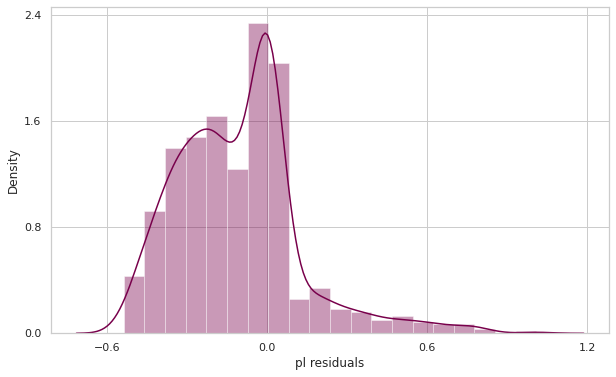

In [11]:
# histogram
mpi_blue = (51/255, 165/255, 195/255)
mpi_red = (120/255, 0/255, 75/255)
mpi_green = (0/255, 118/255, 1/255)
mpi_grey = (56/255, 60/255, 60/255)
import scipy.stats as stats
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(10, 6))
sns.distplot(df_target, bins=20, kde=True, color=mpi_red);
# Set a maximum number of ticks for the x-axis
max_ticks = 4  # Adjust this value to control the number of ticks
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=False, nbins=max_ticks))
max_ticks = 4  # Adjust this value to control the number of ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=False, nbins=max_ticks))
plt.savefig('PL_density.svg', bbox_inches="tight")
plt.show()

In [ ]:
# boxplot
sns.boxplot(df_target)

### Explore Input Variables

In [ ]:
# use describe to get a summary of the data
df_input.describe()

In [ ]:
#histogram
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(12,10))
fig.tight_layout()
sns.distplot(df['partial pressure CH4 in bar'], ax=axs[0, 0]);
sns.distplot(df['partial pressure CO2 in bar'], ax=axs[0, 1]);
sns.distplot(df['partial pressure H2O in bar'], ax=axs[0, 2]);
sns.distplot(df['partial pressure H2 in bar'], ax=axs[0, 3]);
sns.distplot(df['inlet temperature in K'], ax=axs[1, 0]);
sns.distplot(df['temperature in K'], ax=axs[1, 1]);
sns.distplot(df['residence time in s'], ax=axs[1, 2]);
sns.distplot(df['portion of product in feed'], ax=axs[1, 3]);

### Exploring Target-Input Relationships

In [ ]:
matplotlib_axes_logger.setLevel('ERROR')
#scatter plot pressure/ mass fraction CO2
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
fig.tight_layout()
y_text = 'pl residuals'
# CH4 inlet partial pressure
var_pCH4 = 'partial pressure CH4 in bar'
data = pd.concat([df_target, df[var_pCH4]], axis=1)
data.plot.scatter(x=var_pCH4, y=y_text, ax=axs[0, 0]);
# CO2 inlet partial pressure
var_pCO2 = 'partial pressure CO2 in bar'
data = pd.concat([df_target, df[var_pCO2]], axis=1)
data.plot.scatter(x=var_pCO2, y=y_text, ax=axs[0, 1]);
# H2O inlet partial pressure
var_pH2O = 'partial pressure H2O in bar'
data = pd.concat([df_target, df[var_pH2O]], axis=1)
data.plot.scatter(x=var_pH2O, y=y_text, ax=axs[0, 2]);
# H2 inlet partial pressuren
var_pH2 = 'partial pressure H2 in bar'
data = pd.concat([df_target, df[var_pH2]], axis=1)
data.plot.scatter(x=var_pH2, y=y_text, ax=axs[0, 3]);
# Inlet Temperature
var_T_in = 'inlet temperature in K'
data = pd.concat([df_target, df[var_T_in]], axis=1)
data.plot.scatter(x=var_T_in, y=y_text, ax=axs[1, 0]);
# Temperature
var_T = 'temperature in K'
data = pd.concat([df_target, df[var_T]], axis=1)
data.plot.scatter(x=var_T, y=y_text, ax=axs[1, 1]);
# Residence Time
var_t = 'residence time in s'
data = pd.concat([df_target, df[var_t]], axis=1)
data.plot.scatter(x=var_t, y=y_text, ax=axs[1, 2]);
# Product in Feed
var_product = 'portion of product in feed'
data = pd.concat([df_target, df[var_product]], axis=1)
data.plot.scatter(x=var_product, y=y_text, ax=axs[1, 3]);

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
fig.tight_layout()
sns.boxplot(df['partial pressure CH4 in bar'], ax=axs[0, 0]);
sns.boxplot(df['partial pressure CO2 in bar'], ax=axs[0, 1]);
sns.boxplot(df['partial pressure H2O in bar'], ax=axs[0, 2]);
sns.boxplot(df['partial pressure H2 in bar'], ax=axs[0, 3]);
sns.boxplot(df['inlet temperature in K'], ax=axs[1, 0]);
sns.boxplot(df['temperature in K'], ax=axs[1, 1]);
sns.boxplot(df['residence time in s'], ax=axs[1, 2]);
sns.boxplot(df['portion of product in feed'], ax=axs[1, 3]);

In [ ]:
# correlation matrix 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, vmin=-1, vmax=1, square=True, cmap='coolwarm');